# Phase Diagram of Water using the Clausius Clapeyron Relation

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MatSciEd/Thermodynamics/blob/main/1. UnaryPhasediagrams/1.1 Phase Diagram of Water.ipynb)

In this notebook we will calculate the phase diagram of water from the measured volume and heat of transformation at the triple point. The calculated phase diagram is an excellent approximation to the measured phase diagram over many decades of pressure.
This Python notebook is based on the work by Prof. John A. Marohn, http://marohn-public.site44.com/Marohn-20180418-005000-Phase-Diagram.html and uses data from Prof. Martin Chaplin at the University of London South Bank [https://water.lsbu.ac.uk/water/water_sitemap.html](https://water.lsbu.ac.uk/water/water_sitemap.html).

### How to run Jupyter Lab and Python 

The easiest way to launch a Jupyter notebook is to through Anaconda, which you can install on your computer:

* [Install Anaconda for Windows](https://docs.anaconda.com/anaconda/install/windows/)
* [Install Anaconda for MacOS](https://docs.anaconda.com/anaconda/install/mac-os/)

After the installation, start the Anaconda Navigator and launch Jupyter Lab.

### Preliminaries
Import the units, numerical, and plotting packages.

In [1]:
# Import NumPy numerical package
import numpy as np

# Install the pint package using pip in the current Jupyter kernel
# To use pint, restart the kernel
import sys
!{sys.executable} -m pip install pint

# Disable Pint's old fallback behavior (must come before importing Pint)
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"

# Import Pint for units in Python
from pint import UnitRegistry
u = UnitRegistry(auto_reduce_dimensions=True)
u.default_format = 'P'

# plotting package
import matplotlib.pyplot as plt
%pylab inline

import matplotlib
matplotlib.rcParams.update({'font.size': 24, 'text.usetex': False})

Populating the interactive namespace from numpy and matplotlib


### Thermodynamic data
Input the temperature and pressure at three important reference points in the water phase diagram.

In [2]:
# (T,P) at the triple point

T_trip = 273.16*u.K
P_trip = 611.73*u.Pa

# (T,P) at the p = 1 bar boiling point 

T_boil = (99.61+273.15)*u.K # IUPAC convention
P_boil = 100.0*u.kPa

# (T,P) at the critical point

T_crit = 647.3*u.K
P_crit = 22.050*u.MPa

Make a nice printout of $(T,P)$ at the triple point, boiling point, and critical point:

In [3]:
print("Tiple point    = ({}, {})".format(T_trip,P_trip))
print("Boiling point  = ({}, {})".format(T_boil,P_boil))
print("Critical point = ({}, {})".format(T_crit,P_crit))

Tiple point    = (273.16 kelvin, 611.73 pascal)
Boiling point  = (372.76 kelvin, 100.0 kilopascal)
Critical point = (647.3 kelvin, 22.05 megapascal)


In [4]:
P_crit.to('mmHg')

165388.57747396725 <Unit('millimeter_Hg')>

At the boiling point of water, the enthalpy of vaporization is

In [5]:
H_vap_boil = 40.66*u.kJ/u.mol

Now enter the water enthalpy change and molar volume change at the triple point. This data is quite hard to track down! Prof. Martin Chaplin at the University of London South Bank has a cvery comprehensive website with information about water, including the data we require for the triple point, [https://water.lsbu.ac.uk/water/water_sitemap.html](https://water.lsbu.ac.uk/water/water_sitemap.html)

Here are the molar enthalpy, $\Delta H'$, molar entropy $\Delta S'$, and molar volume, $\Delta V'$ for water undergoing melting, vaporization, and sublimation at the critical point.

In [6]:
# melting: solid to liquid

H_melt = 5.98*u.kJ/u.mol
S_melt = 22*u.J/(u.mol*u.K)
V_melt = -1.634*u.cc/u.mol

# vaporization: liquid to gas

H_vap = 44.9*u.kJ/u.mol
S_vap = 165.0*u.J/(u.mol*u.K)
V_vap = 22050.0*u.cc/u.mol

# sublimation: solid to vapor

H_sub = 50.9*u.kJ/u.mol
S_sub = 186.0*u.J/(u.mol*u.K)
V_sub = 22048.0*u.cc/u.mol

### Solid-liquid line
We can use the Clausius-Clapeyron relation to obtain the approximate solid-liquid phase boundary by assuming that the heat of transformation and the volume of transformation are independent of pressure and temperature:
$$
p(T) = p_0 + \frac{\Delta H'_\mathrm{melt}}{\Delta V'_\mathrm{melt}} \ln \left ( \frac{T}{T_0} \right ) ,
$$
where, $T_0$ and $p_0$ are the temperature and pressure of the reference state. If we use the triple point as the reference state, we can calculate the transition pressure as a function of temperature. Let us use temperatures ranging from 5 K below the triple point up to the triple point:

In [7]:
T_melt = np.linspace(T_trip.magnitude-5.0,T_trip.magnitude,100)*u.K   # array of temp points
constant_melt = H_melt/V_melt                                         # constant
constant_melt.ito_base_units()                                        # convert constant to base units
P_melt = P_trip + constant_melt*np.log(T_melt/T_trip)                 # array of pressure point

We only want to look over 5 degrees kelvin temperature range because the slope of $p(T)$ is so large. The slope is determined by the constant $\Delta H'_\mathrm{melt}/\Delta V_\mathrm{melt}$, which is

In [8]:
print(constant_melt.to(u.GPa))

-3.659730722154224 gigapascal


Plot the pressure vs. temperature line describing the solid-liquid phase boundary. The **circle** is the triple point.

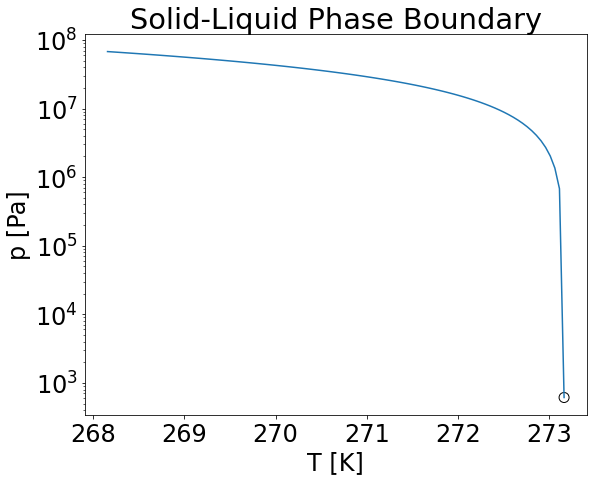

In [9]:
fig = plt.figure(figsize=(9,7))
plt.semilogy((T_melt/u.K).magnitude,(P_melt/u.Pa).magnitude)
plt.scatter([(T_trip/u.K).magnitude],[(P_trip/u.Pa).magnitude],s=100, facecolors='none', edgecolors='k')
plt.xlabel('T [K]')
plt.ylabel('p [Pa]')
plt.title('Solid-Liquid Phase Boundary')
plt.show()

### Solid-gas line
We derived in class from the Clausius Clapeyron equation that the vapor pressure for a solid-gas equilibrium is approximated by
$$
p=p_0 \exp \left \{ \frac{\Delta H'_\mathrm{sub}}{R} \left ( \frac{1}{T_0}-\frac{1}{T} \right) \right \} ,
$$
where $T_0$ and $p_0$ are the temperature and pressure of the reference point. This derivation assumed that the gas phase is described by the ideal gas law and that the molar volume of the solid or liquid phase is negligibly small compared to the molar volume of the gas.

For the solid-gas transformation, the $p(T)$ curve is not as steep as for the solid-liquid transformation. We will now look at temperature extending as far as 60 K below the triple point.

In [10]:
R = 8.314*u.J/(u.mol*u.K)                        # gas constant

T_sub = np.linspace(T_trip.magnitude-60,T_trip.magnitude,100)*u.K  # array of temp points

constant_sub = H_sub/R                           # constant
constant_sub.ito_base_units()                    # constant converted to base units
T_sub_reduced = constant_sub*(1/T_trip-1/T_sub)  # reduced temperature -> the exponent eqn above
T_sub_reduced.ito_base_units()                   # the reduced temperature converted to base units
P_sub = P_trip*np.exp(T_sub_reduced)             # the pressure

The `constant_sub` in the above code is equal to $\Delta H'_\mathrm{sub}/ R$. This ratio has units of temperature and evaluates to

In [11]:
constant_sub

6122.203512148183 <Unit('kelvin')>

The temperature and pressure at the starting and ending points of the plot:

In [12]:
print("starting point = ({}, {})".format(T_sub[0],P_sub[0].to(u.Pa)))
print("  ending point = ({}, {})".format(T_sub[-1],P_sub[-1].to(u.Pa)))

starting point = (213.16000000000003 kelvin, 1.1136517136402646 pascal)
  ending point = (273.16 kelvin, 611.73 pascal)


Plot the pressure-versus-temperature line describing the solid-gas boundary. The **circle** is the triple point.

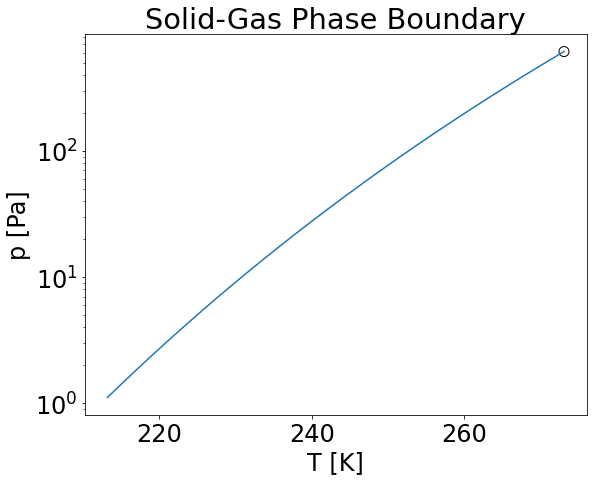

In [13]:
fig = plt.figure(figsize=(9,7))
plt.semilogy((T_sub/u.K).magnitude,(P_sub/u.Pa).magnitude)
plt.scatter([(T_trip/u.K).magnitude],[(P_trip/u.Pa).magnitude],s=100, facecolors='none', edgecolors='k')
plt.xlabel('T [K]')
plt.ylabel('p [Pa]')
plt.title('Solid-Gas Phase Boundary')
plt.show()

### Liquid-gas transformation line
The pressure at the liquid-gas boundary is approximated by
$$
P=P_0 \exp \left \{ \frac{\Delta H'_\mathrm{vap}}{R} \left ( \frac{1}{T_0} − \frac{1}{T} \right ) \right \} ,
$$
where $T_0$ and $P_0$ are the temperature and pressure at the reference point.

For this derviation, we assumed that the pressure of the gas is well described by the ideal-gas law. We look at temperature extending from the triple point up to the critical point. We will plot two curves. The first one uses the critical point as the reference point. The second one uses 373 K, the boiling temperature of water at 1 atm, as the reference temperature.

In [14]:
R = 8.314*u.J/(u.mol*u.K)                           # gas constant

T_vap1 = np.linspace(T_trip.magnitude,T_crit.magnitude,100)*u.K  # array of temp. points

constant_vap1 = H_vap/R                             # constant
constant_vap1.ito_base_units()                      # .. converted to base units
T_vap1_reduced = constant_vap1*(1/T_trip-1/T_vap1)  # reduced temperature .. the exponent
T_vap1_reduced.to_base_units()                      # .. converted to base units
P_vap1 = P_trip*np.exp(T_vap1_reduced)              # array of pressure

T_vap2 = np.linspace(T_boil.magnitude-50,T_crit.magnitude,10)*u.K # array of temp. point

constant_vap2 = H_vap_boil/R                        # constant
constant_vap2.ito_base_units()                      # .. converted to base units
T_vap2_reduced = constant_vap2*(1/T_boil-1/T_vap2)  # reduced temperature
T_vap2_reduced.to_base_units()                      # .. converted to base units
P_vap2 = P_boil*np.exp(T_vap2_reduced)              # array of pressure points

Plot the solid-liquid phase boundary. The circle in the lower left is the triple point and the circle in the upper right is the critical point. The dotted line is the phase boundary line extrapolated all the way from the triple point to the critical point. The solid line is the phase boundary line extrapolated from the 1-atm boiling temperature to the critical point.

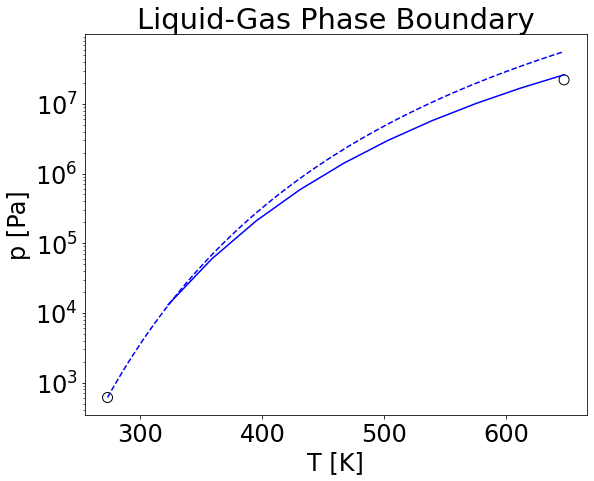

In [15]:
fig = plt.figure(figsize=(9,7))
plt.semilogy((T_vap1/u.K).magnitude,(P_vap1/u.Pa).magnitude,'b--')
plt.semilogy((T_vap2/u.K).magnitude,(P_vap2/u.Pa).magnitude,'b-')
plt.scatter([(T_crit/u.K).magnitude],[(P_crit/u.Pa).magnitude],s=100, facecolors='none', edgecolors='k')
plt.scatter([(T_trip/u.K).magnitude],[(P_trip/u.Pa).magnitude],s=100, facecolors='none', edgecolors='k')
plt.xlabel('T [K]')
plt.ylabel('p [Pa]')
plt.title('Liquid-Gas Phase Boundary')
plt.show()

### Entire phase diagram
Put together the pieces of the phase diagram that we have just developed. In the plot below, the filled circle indicates the critical point. The solid line overestimates the pressure at the critical point. We can see that estimating the phase line from the 1-atm boiling point significantly improves the accuracy of the phase-boundary line -- the dotted line more closely intersects the critial point.

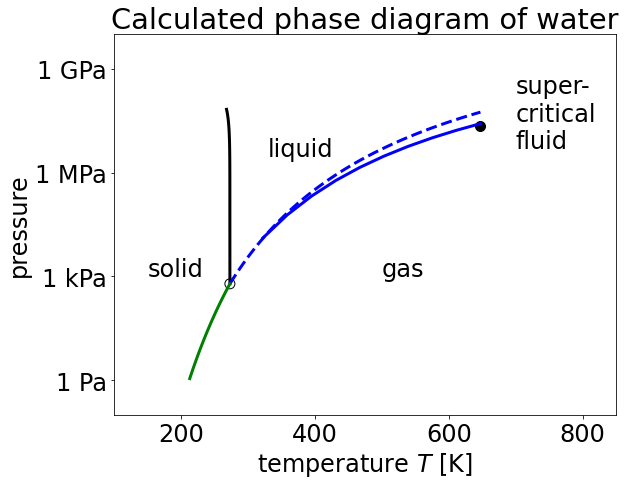

In [16]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

plt.semilogy((T_melt/u.K).magnitude, (P_melt/u.Pa).magnitude, 'k-', linewidth=3.0)
plt.semilogy((T_vap1/u.K).magnitude, (P_vap1/u.Pa).magnitude, 'b--', linewidth=3.0)
plt.semilogy((T_vap2/u.K).magnitude, (P_vap2/u.Pa).magnitude, 'b-', linewidth=3.0)
plt.semilogy((T_sub/u.K).magnitude, (P_sub/u.Pa).magnitude, 'g-', linewidth=3.0)

plt.scatter([(T_crit/u.K).magnitude],[(P_crit/u.Pa).magnitude],s=100, facecolors='k', edgecolors='k')
plt.scatter([(T_trip/u.K).magnitude],[(P_trip/u.Pa).magnitude],s=100, facecolors='none', edgecolors='k')

plt.xlabel('temperature $T$ [K]')
plt.xticks([200,400,600,800])
plt.xlim([100,850])
plt.ylabel('pressure')
plt.yticks([1.0,1E3,1E6,1E9],['1 Pa','1 kPa','1 MPa','1 GPa'])
plt.ylim([0.1,1E10])
plt.title('Calculated phase diagram of water')

ax.annotate('solid', xy=(150,1E3), xycoords='data')
ax.annotate('liquid', xy=(330,3E6), xycoords='data')
ax.annotate('gas', xy=(500,1E3), xycoords='data')
ax.annotate('super-\ncritical\nfluid', xy=(700,5E6), xycoords='data')

plt.show()

Compare this calculated phase diagram to the experimental phase diagram of water at

[<img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Phase_diagram_of_water.svg">](https://en.wikipedia.org/wiki/Phase_diagram)
